# Customer Analysis For Retail

Business Problem

A Retail store is required to analyze the day-to-day transactions and keep a track of its customers spread across various locations along with their purchases/returns across various categories.

Create a report and display the below calculated metrics, reports and inferences.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import the data set

In [2]:
customer = pd.read_csv("Customer.csv")
prod_info = pd.read_csv("prod_cat_info.csv")
transaction = pd.read_csv("Transactions.csv")

# EDA  Analysis

In [3]:
customer.shape

(5647, 4)

In [4]:
prod_info.shape

(23, 4)

In [5]:
transaction.shape

(23053, 10)

In [6]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [7]:
prod_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
# renaming "prod_sub_cat_code" column in 'prod_info' table to make it similar to 'transaction' table
# to merge the both the tables easily
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [10]:
prod_info.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final

In [11]:
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concat = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

In [12]:
prod_concat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [13]:
#merge "prod_concat" and "customer" table and create the final table "customer_final"
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [14]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [15]:
customer_final.shape

(23053, 16)

In [16]:
transaction.shape

(23053, 10)

Rows of both the 'customer_final' and 'transaction' table are same. 
<br>That means all the transactions done at the Retail Store are present in the final table 

In [17]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [19]:
# converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

In [23]:
customer_final["tran_date"].head(1)

0   2014-02-28
Name: tran_date, dtype: datetime64[ns]

In [24]:
customer_final['DOB'].head(1)

0   1981-09-26
Name: DOB, dtype: datetime64[ns]

In [18]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

# Checking for duplicate rows

In [25]:
customer_final.duplicated().sum()

13

In [26]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [27]:
customer_final.duplicated().sum()

0

# Question 2

(a) : Prepare a summary report for the merged data set -- Get the column names and their corresponding data types

In [28]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  int64         
 1   cust_id           23040 non-null  int64         
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  int64         
 4   prod_cat_code     23040 non-null  int64         
 5   Qty               23040 non-null  int64         
 6   Rate              23040 non-null  int64         
 7   Tax               23040 non-null  float64       
 8   total_amt         23040 non-null  float64       
 9   Store_type        23040 non-null  object        
 10  prod_cat          23040 non-null  object        
 11  prod_subcat       23040 non-null  object        
 12  customer_Id       23040 non-null  int64         
 13  DOB               23040 non-null  datetime64[ns]
 14  Gender            2303

(b) : Top/Bottom 10 observations

In [30]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [31]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


(c) : “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [33]:
customer_final[['Qty', 'Rate', 'Tax','total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,23040.000000,23040.000000,23040.000000,23040.000000
mean,2.435764,637.094965,248.677488,2109.865226
std,2.264326,621.727374,187.188311,2505.610295
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1756.950000
75%,4.000000,1109.000000,365.767500,3570.255000
max,5.000000,1500.000000,787.500000,8287.500000


(d) : Frequency tables for all the categorical variables

In [34]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


# Question 3: Generate histograms for all continuous variables and frequency bars for categorical variables.

Histogram for all the continuous variables

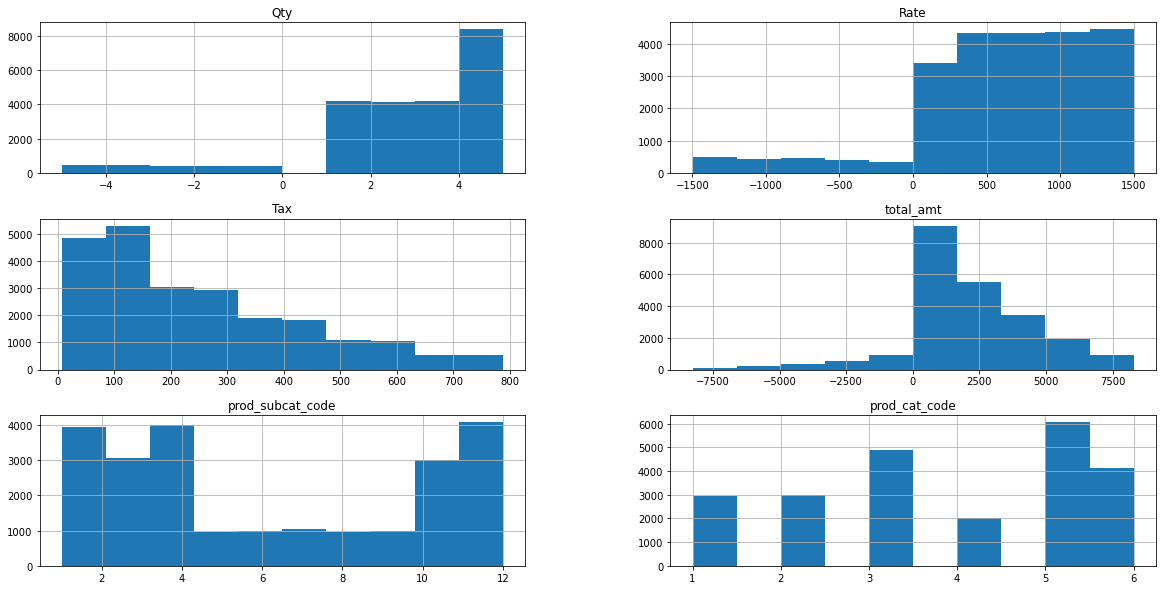

In [48]:
customer_final[['Qty', 'Rate', 'Tax','total_amt','prod_subcat_code','prod_cat_code']].hist(figsize = (20,10))
plt.show()

frequency bars for categorical variables.

In [49]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

In [50]:
category_customer.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


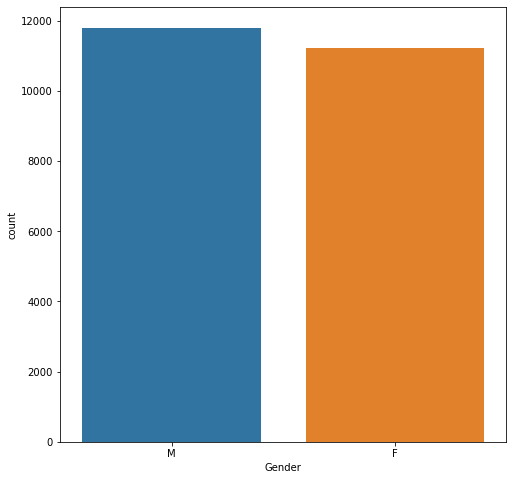

In [51]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Gender'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


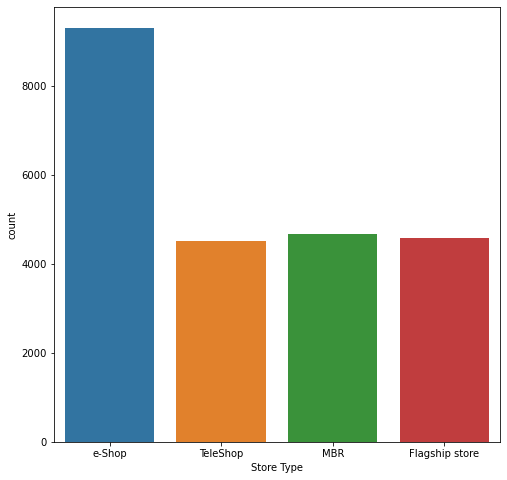

In [52]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


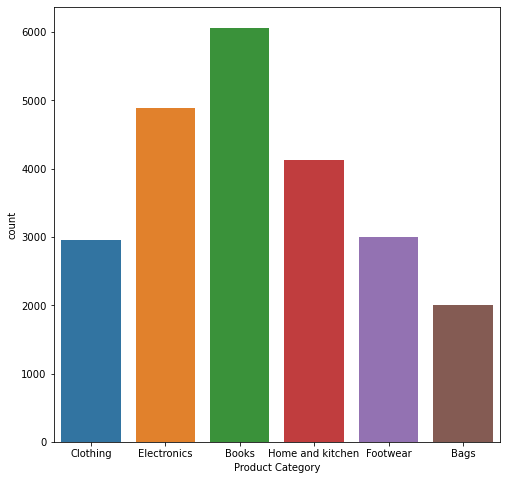

In [53]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

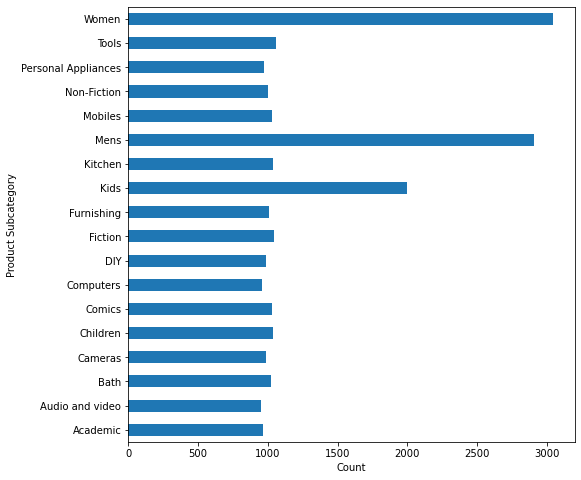

In [54]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

# Question 4

(a) : Time period of the available transaction data

In [55]:
customer_final['tran_date'].min(),customer_final['tran_date'].max()

(Timestamp('2011-01-02 00:00:00'), Timestamp('2014-12-02 00:00:00'))

In [59]:
customer_final['tran_date'].max().year-customer_final['tran_date'].min().year

3

(b) : Count of transactions where the total amount of transaction was negative

In [60]:
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
negative_transaction

2164

# Question 5: Analyze which product categories are more popular among females vs male customers.

In [79]:
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


Products that are popular among males are:

<br>Books
<br>Clothing
<br>Electronics
<br>Home and kitchen

<br>Products that are popular among females are:

<br>Bags
<br>Footwear

# Question 6 : Which City code has the maximum customers and what was the percentage of customers from that city?

In [81]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

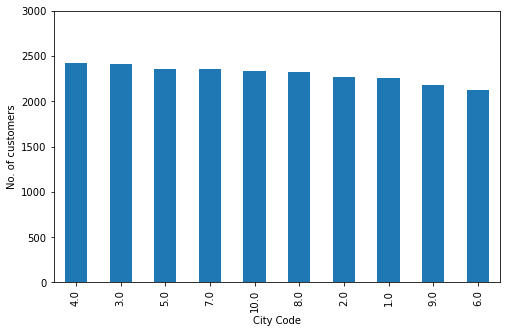

In [82]:
plt.figure(figsize=(8,5))
customer_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [83]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
percentage

10.52

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.52

# 7.Which store type sells the maximum products by value and by quantity?

In [84]:
customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

C:\Users\Mdhar\AppData\Local\Temp/ipykernel_16496/2464577125.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


e-Shop store sell the maximum products by value and by quantity

# (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [86]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [89]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

# (9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [94]:
male_customer=customer_final.loc[(customer_final["Gender"]=='M') & (customer_final["prod_cat"] =='Electronics' ), "total_amt"].sum()
male_customer

5711351.62

# (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [97]:
positive_amt = customer_final[customer_final["total_amt"]>= 0 ]


In [104]:
unique_10_tr1 = positive_amt.groupby('customer_Id').transaction_id.count().reset_index()
print("10 unique transactions details")
unique_10_tr2 = unique_10_tr1[unique_10_tr1["transaction_id"]>10]
print(unique_10_tr2)


print("number of 10 unique transactions")
unique_10_tr2['transaction_id'].count()

10 unique transactions details
      customer_Id  transaction_id
4          266794              11
2426       270535              11
2606       270803              11
3867       272741              11
4032       273014              11
4815       274227              11
number of 10 unique transactions


6

# Question 11

(a) : For all customers aged between 25 - 35, find out: What was the total amount spent for “Electronics” and “Books” product categories?

In [108]:
from datetime import datetime, date

In [115]:
customer_final["Age"] =datetime.now().year-customer_final["DOB"].dt.year

In [117]:
data_set = customer_final.loc[customer_final.prod_cat.isin(["Electronics", "Books"]), ["prod_cat", "total_amt", "Age"]]

data_set.loc[data_set.Age.isin(np.arange(25,36,1)), :].groupby("prod_cat").total_amt.sum().reset_index()

,prod_cat,total_amt
0,Books,3174082.665
1,Electronics,2884375.975


# (b): What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [125]:
start = customer_final['tran_date'].min()
end =  customer_final['tran_date'].max()

data = customer_final.loc[(customer_final.tran_date > start) & (customer_final.tran_date < end), ["Age", "tran_date", "total_amt"]]
round(data.loc[data.Age.isin(np.arange(25,36,1)), "total_amt"].sum(),2)

12942572.18